# 01. Preparing Notebook
## 01a. Creating dummy variables
# 02. Consistency Checks
## 02a. Missing Values
## 02b. Mixed-type columns
## 02c. Duplicates
## 3. Descriptive Analysis

## 01. Preparing Notebook

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing dataset without index
df = pd.read_csv(r'C:\Users\lifti\OneDrive\CareerFoundry\Data Immersion\Achievement6\German Housing Data\02 Data\Original Data\germany_housing_data_14.07.2020.csv', index_col = 0)

In [86]:
pd.options.display.max_rows = 20

In [58]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(100)

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype;
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot;
"2,749000.0,Farmhouse,162.89,82.0,37.62, 01.07.2020 ,5.0,3.0,2.0,4.0,2013.0,,,dilapidated,stove heating,"" Fernwärme, Bioenergie "",available,demand certificate,, B ,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,749000.0,Mid-terrace house,154.00,6050.0,NaN,nach Absprache,5.0,1.0,1.0,2.0,...,Gas,available for inspection,NaN,NaN,NaN,Baden-Württemberg,Heilbronn (Kreis),Flein,5.0,Parking lot;
96,479000.0,Single dwelling,130.00,285.0,10.0,Juni 2020,6.0,3.0,1.0,4.0,...,Öl,available,demand certificate,NaN,G,Baden-Württemberg,Ludwigsburg (Kreis),Schwieberdingen,1.0,Garage;
97,1800000.0,Duplex,419.00,1720.0,NaN,NaN,22.0,NaN,NaN,NaN,...,Gas,available,consumption certificate,116.13,D,Baden-Württemberg,Calw (Kreis),Nagold,27.0,Parking lot;
98,2150000.0,Villa,624.00,2288.0,150.0,01.01.2020,14.0,4.0,5.0,5.0,...,Erdgas leicht,NaN,NaN,NaN,NaN,Baden-Württemberg,Baden-Baden,Innenstadt,1.0,Garage;


In [3]:
# There is a problem with the index of the dataset. It seems that 553 datarows are affected.
df['State'].value_counts (dropna = False )

Nordrhein-Westfalen       1590
Bayern                    1235
Baden-Württemberg         1230
Niedersachsen             1229
Rheinland-Pfalz            965
Hessen                     930
NaN                        553
Schleswig-Holstein         539
Sachsen                    509
Brandenburg                468
Mecklenburg-Vorpommern     355
Sachsen-Anhalt             352
Berlin                     207
Saarland                   164
Thüringen                  132
Bremen                      49
Hamburg                     45
Name: State, dtype: int64

In [4]:
# I will deal with the problem by creating df_2 without the 553 'NaN' from the variable 'state'
df_2 = df[df['State'].isnull() == False]

In [5]:
df_2.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype;
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot;
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,NaN,NaN,3.0,...,Öl,available,consumption certificate,NaN,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage;


In [7]:
df_2.shape

(9999, 25)

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 10550
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    9999 non-null   float64
 1   Type                     9616 non-null   object 
 2   Living_space             9999 non-null   float64
 3   Lot                      9999 non-null   float64
 4   Usable_area              5313 non-null   float64
 5   Free_of_Relation         6652 non-null   object 
 6   Rooms                    9999 non-null   float64
 7   Bedrooms                 6506 non-null   float64
 8   Bathrooms                8305 non-null   float64
 9   Floors                   7483 non-null   float64
 10  Year_built               9323 non-null   float64
 11  Furnishing_quality       7434 non-null   object 
 12  Year_renovated           5048 non-null   float64
 13  Condition                9690 non-null   object 
 14  Heating                  943

## 01a. Creating Dummy Variables

In [6]:
# Flagging 'Furnishing_quality' with dummy numbers
# basic = 1
# normal = 2
# refined = 3
# luxus = 4
# we start with creating a dictionary
furnish_dict = {
    'basic': '1',
    'normal': '2',
    'refined': '3',
    'luxus': '4'
}

In [7]:
furnish_dict

{'basic': '1', 'normal': '2', 'refined': '3', 'luxus': '4'}

In [8]:
df_2['furnish_dummy'] = df_2['Furnishing_quality'].map(furnish_dict)

C:\Users\lifti\AppData\Local\Temp/ipykernel_1448/794995168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['furnish_dummy'] = df_2['Furnishing_quality'].map(furnish_dict)


In [9]:
df_2.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,NaN,...,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,NaN,NaN,3.0,...,available,consumption certificate,NaN,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage;,1


In [10]:
# Flagging 'Condition' with dummy numbers
# dilapidated = 1
# fixer-upper = 2
# maintained = 3
# refurbished = 4
# modernized = 5
# first occupation after refurbishment = 5
# renovated = 6
# as new = 6
# first occupation = 7

# we start with creating a dictionary
condition_dict = {
    'dilapidated': '1',
    'fixer-upper': '2',
    'maintained': '3',
    'refurbished': '4',
    'modernized': '5',
    'first occupation after refurbishment': '5',
    'renovated': '6',
    'as new': '6',
    'first occupation': '7'
}

In [11]:
condition_dict

{'dilapidated': '1',
 'fixer-upper': '2',
 'maintained': '3',
 'refurbished': '4',
 'modernized': '5',
 'first occupation after refurbishment': '5',
 'renovated': '6',
 'as new': '6',
 'first occupation': '7'}

In [12]:
df_2['condition_dummy'] = df_2['Condition'].map(condition_dict)

C:\Users\lifti\AppData\Local\Temp/ipykernel_1448/2006139682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['condition_dummy'] = df_2['Condition'].map(condition_dict)


In [13]:
df_2.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2,5
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1,5
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1,2
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3,4
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,NaN,NaN,3.0,...,consumption certificate,NaN,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage;,1,3


In [14]:
# Flagging 'Energy_efficiency_class' with dummy numbers
# H = 1
# G = 2
# F = 3
# E = 4
# D = 5
# C = 6
# B = 7
# A = 8
# A+ = 9

# we start with creating a dictionary
energy_dict = {
    ' H ': '1',
    ' G ': '2',
    ' F ': '3',
    ' E ': '4',
    ' D ': '5',
    ' C ': '6',
    ' B ': '7',
    ' A ': '8',
    ' A+ ': '9'
}

In [15]:
energy_dict

{' H ': '1',
 ' G ': '2',
 ' F ': '3',
 ' E ': '4',
 ' D ': '5',
 ' C ': '6',
 ' B ': '7',
 ' A ': '8',
 ' A+ ': '9'}

In [16]:
df_2['energy_dummy'] = df_2['Energy_efficiency_class'].map(energy_dict)

C:\Users\lifti\AppData\Local\Temp/ipykernel_1448/3913576785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['energy_dummy'] = df_2['Energy_efficiency_class'].map(energy_dict)


In [17]:
# Creating dummy variable for Type
# Flagging 'Type' with dummy numbers
# we start with creating a dictionary
Type_dict = {
    'Mid-terrace house': '1',
    'Duplex': '2',
    'Single dwelling': '3',
    'Farmhouse': '4',
    'NaN': '5',
    'Villa': '6',
    'Multiple dwelling': '7',
    'Residential property': '8',
    'Special property': '9',
    'Bungalow': '10',
    'Corner house': '11',
    'Castle': '12'
}

In [19]:
Type_dict

{'Mid-terrace house': '1',
 'Duplex': '2',
 'Single dwelling': '3',
 'Farmhouse': '4',
 'NaN': '5',
 'Villa': '6',
 'Multiple dwelling': '7',
 'Residential property': '8',
 'Special property': '9',
 'Bungalow': '10',
 'Corner house': '11',
 'Castle': '12'}

In [18]:
df_2['type_dummy'] = df['Type'].map(Type_dict)

C:\Users\lifti\AppData\Local\Temp/ipykernel_1448/768433432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['type_dummy'] = df['Type'].map(Type_dict)


In [19]:
df_2.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,type_dummy
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2,5,5,7
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1,5,NaN,1
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1,2,2,4
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3,4,3,7
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,NaN,NaN,3.0,...,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage;,1,3,NaN,1


In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 10550
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    9999 non-null   float64
 1   Type                     9616 non-null   object 
 2   Living_space             9999 non-null   float64
 3   Lot                      9999 non-null   float64
 4   Usable_area              5313 non-null   float64
 5   Free_of_Relation         6652 non-null   object 
 6   Rooms                    9999 non-null   float64
 7   Bedrooms                 6506 non-null   float64
 8   Bathrooms                8305 non-null   float64
 9   Floors                   7483 non-null   float64
 10  Year_built               9323 non-null   float64
 11  Furnishing_quality       7434 non-null   object 
 12  Year_renovated           5048 non-null   float64
 13  Condition                9690 non-null   object 
 14  Heating                  943

In [20]:
# changing datatype of new variables to string
df_2['furnish_dummy'] = df_2['furnish_dummy'].astype('float64')
df_2['condition_dummy'] = df_2['condition_dummy'].astype('float64')
df_2['energy_dummy'] = df_2['energy_dummy'].astype('float64')
df_2['type_dummy'] = df_2['type_dummy'].astype('float64')

C:\Users\lifti\AppData\Local\Temp/ipykernel_1448/1059716973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['furnish_dummy'] = df_2['furnish_dummy'].astype('float64')
C:\Users\lifti\AppData\Local\Temp/ipykernel_1448/1059716973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['condition_dummy'] = df_2['condition_dummy'].astype('float64')
C:\Users\lifti\AppData\Local\Temp/ipykernel_1448/1059716973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 10550
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    9999 non-null   float64
 1   Type                     9616 non-null   object 
 2   Living_space             9999 non-null   float64
 3   Lot                      9999 non-null   float64
 4   Usable_area              5313 non-null   float64
 5   Free_of_Relation         6652 non-null   object 
 6   Rooms                    9999 non-null   float64
 7   Bedrooms                 6506 non-null   float64
 8   Bathrooms                8305 non-null   float64
 9   Floors                   7483 non-null   float64
 10  Year_built               9323 non-null   float64
 11  Furnishing_quality       7434 non-null   object 
 12  Year_renovated           5048 non-null   float64
 13  Condition                9690 non-null   object 
 14  Heating                  943

## 02. Consistency Checks

### 02a. Missing Values

In [34]:
df_2.describe().applymap('{:.3f}'.format)

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages,furnish_dummy,condition_dummy,energy_dummy,type_dummy
count,9999.000,9999.000,9999.000,5313.000,9999.000,6506.000,8305.000,7483.000,9323.000,5048.000,2308.000,8138.000,7434.000,9636.000,5333.000,9616.000
mean,559196.983,216.486,1487.025,134.676,7.388,4.178,2.310,2.290,1959.129,2010.666,118.177,2.677,1.898,4.166,4.199,3.004
std,614673.572,165.972,8704.217,189.870,5.425,2.607,1.761,0.821,55.285,10.611,54.164,3.193,0.835,1.516,2.217,2.761
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1300.000,1900.000,6.400,1.000,1.000,1.000,1.000,1.000
25%,250000.000,130.000,365.500,48.000,5.000,3.000,1.000,2.000,1935.000,2006.000,83.127,1.000,1.000,3.000,2.000,1.000
50%,405000.000,176.000,653.000,80.000,6.000,4.000,2.000,2.000,1971.000,2015.000,113.000,2.000,2.000,5.000,4.000,2.000
75%,659000.000,250.000,1043.500,152.400,8.000,5.000,3.000,3.000,1996.000,2018.000,146.800,3.000,2.000,5.000,6.000,4.000
max,13000000.000,4350.000,547087.000,4034.000,170.000,61.000,44.000,13.000,2022.000,2206.000,503.940,70.000,4.000,7.000,9.000,12.000


In [35]:
# Lets start with missing values
df_2.isnull().sum()

Price                         0
Type                        383
Living_space                  0
Lot                           0
Usable_area                4686
Free_of_Relation           3347
Rooms                         0
Bedrooms                   3493
Bathrooms                  1694
Floors                     2516
Year_built                  676
Furnishing_quality         2565
Year_renovated             4951
Condition                   309
Heating                     568
Energy_source              1223
Energy_certificate          744
Energy_certificate_type    3429
Energy_consumption         7691
Energy_efficiency_class    4666
State                         0
City                          0
Place                       282
Garages                    1861
Garagetype;                   0
furnish_dummy              2565
condition_dummy             363
energy_dummy               4666
type_dummy                  383
dtype: int64

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Usable_area'>

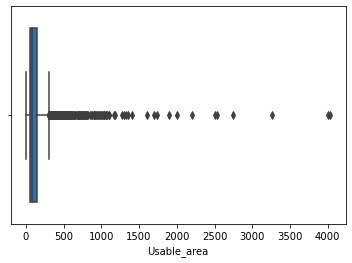

In [58]:
# checking if mean or median is the better way of imputing data
sns.boxplot(df_2.Usable_area)

<AxesSubplot:ylabel='Frequency'>

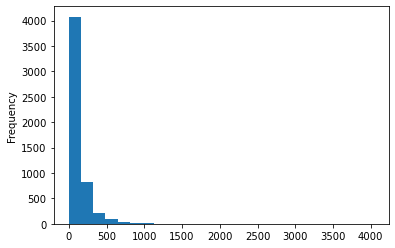

In [64]:
df_2['Usable_area'].plot.hist(bins = 25)

#### Because the variable is skewed, I will imput the Median for 'Usable_area'

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bedrooms'>

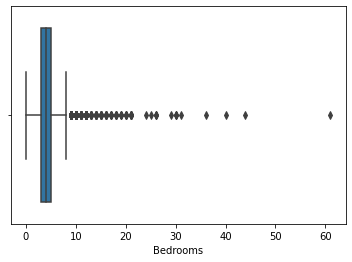

In [65]:
sns.boxplot(df_2.Bedrooms)

<AxesSubplot:ylabel='Frequency'>

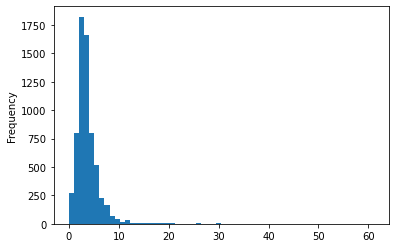

In [79]:
df_2['Bedrooms'].plot.hist(bins = 60)

#### Because the variable is skewed, I will imput the Median for 'Bedrooms'

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathrooms'>

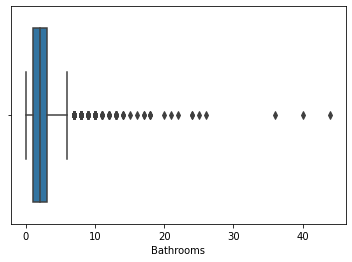

In [81]:
sns.boxplot(df_2.Bathrooms)

<AxesSubplot:ylabel='Frequency'>

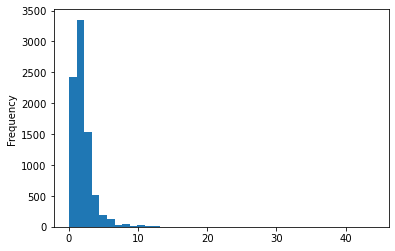

In [82]:
df_2['Bathrooms'].plot.hist(bins = 40)

#### Because the variable is skewed I will imput Median for 'Bathrooms'

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Floors'>

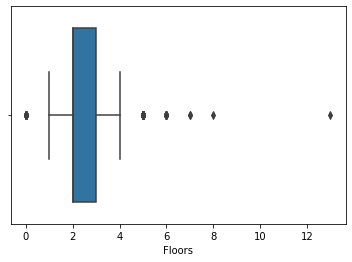

In [84]:
sns.boxplot(df_2.Floors)

<AxesSubplot:ylabel='Frequency'>

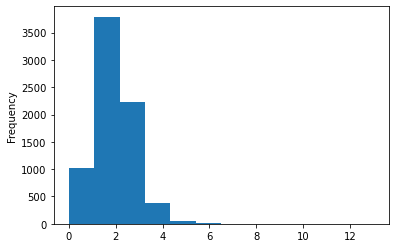

In [85]:
df_2['Floors'].plot.hist(bins = 12)

#### Because the variable is skewed, I will imput the Median for 'Floors'

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year_built'>

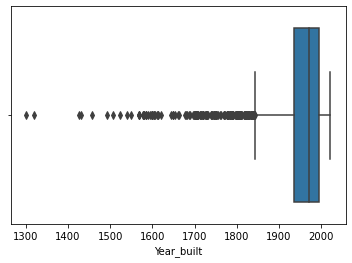

In [87]:
sns.boxplot(df_2.Year_built)

<AxesSubplot:ylabel='Frequency'>

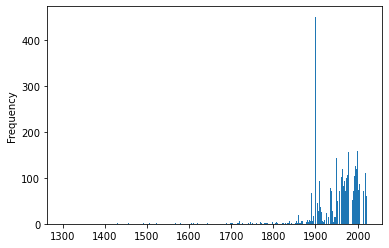

In [88]:
df_2['Year_built'].plot.hist(bins = 1000)

In [89]:
df_2['Year_built'].value_counts (dropna = False)

NaN       676
1900.0    450
1960.0    177
2000.0    158
2020.0    157
1978.0    155
1972.0    148
1950.0    143
1980.0    140
1970.0    140
1920.0    139
1930.0    139
1994.0    134
1998.0    130
1995.0    126
1974.0    124
1999.0    120
1964.0    118
1997.0    118
1968.0    118
1965.0    112
2019.0    111
2001.0    108
1996.0    107
2006.0    107
1975.0    106
1976.0    106
2003.0    103
1993.0    103
1962.0    102
2017.0    100
1973.0     99
1979.0     94
1958.0     94
1910.0     94
1969.0     94
1977.0     91
1992.0     90
2004.0     87
2018.0     85
1955.0     85
1989.0     85
1963.0     83
1967.0     82
1986.0     79
1936.0     77
1985.0     77
1982.0     76
2005.0     75
2007.0     75
2013.0     74
1959.0     74
1984.0     74
1966.0     74
1935.0     73
2002.0     73
1961.0     72
1938.0     72
1971.0     72
2014.0     72
1957.0     72
1990.0     71
1991.0     68
1890.0     68
2011.0     68
1981.0     68
2010.0     66
2008.0     66
2016.0     65
1954.0     64
1983.0     63
1928.0

#### The histogram and counting of the values tell me that many houses were built in 1900. An interpretation of this phenomenon could be that this is the default year if one does not know the exact building year of the house. Therefore I will imput the Median.

<AxesSubplot:ylabel='Frequency'>

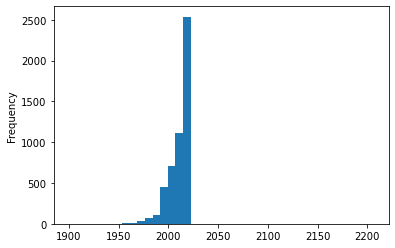

In [90]:
df_2['Year_renovated'].plot.hist(bins = 40)

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year_renovated'>

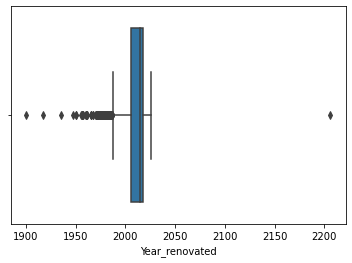

In [91]:
sns.boxplot(df_2.Year_renovated)

#### Because the variable is skewed, I will imput the Median for 'Year_renovated'

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garages'>

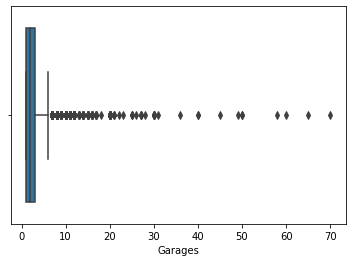

In [92]:
sns.boxplot(df_2.Garages)

<AxesSubplot:ylabel='Frequency'>

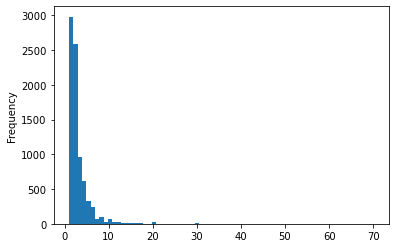

In [94]:
df_2['Garages'].plot.hist(bins = 70)

#### Because the variable is skewed, I will imput the Median for 'Garages'

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='furnish_dummy'>

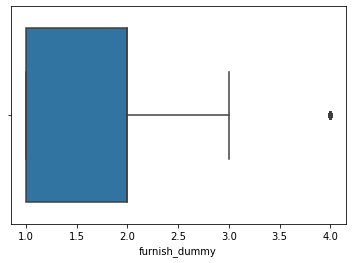

In [51]:
sns.boxplot(df_2.furnish_dummy)

<AxesSubplot:ylabel='Frequency'>

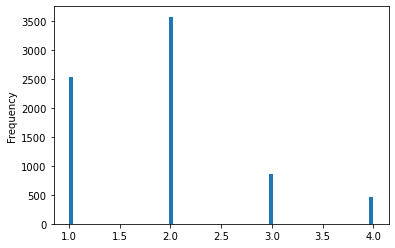

In [52]:
df_2['furnish_dummy'].plot.hist(bins = 70)

#### Because the variable is skewed, I will imput the Median for 'furnish_dummy'

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition_dummy'>

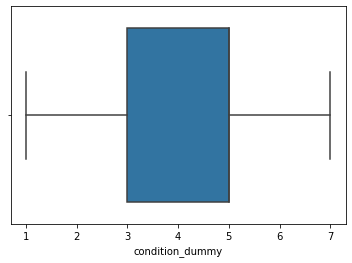

In [55]:
sns.boxplot(df_2.condition_dummy)

<AxesSubplot:ylabel='Frequency'>

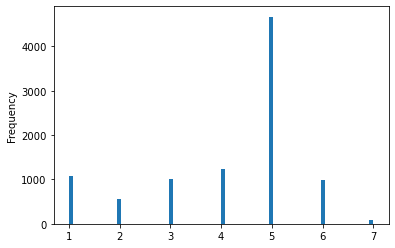

In [56]:
df_2['condition_dummy'].plot.hist(bins = 70)

#### Because the variable is skewed, I will imput the Median for 'condition_dummy'

C:\Users\lifti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_dummy'>

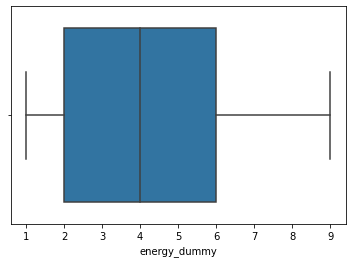

In [58]:
sns.boxplot(df_2.energy_dummy)

<AxesSubplot:ylabel='Frequency'>

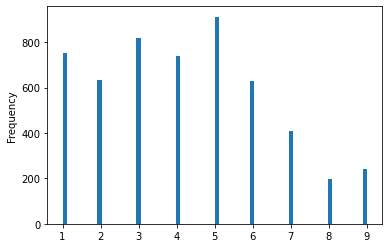

In [57]:
df_2['energy_dummy'].plot.hist(bins = 70)

#### Because the variable is skewed, I will imput the Median for 'energy_dummy'

In [24]:
# Creating df_clean without 'Energy_consumption'
df_clean = df_2.drop (columns = ['Energy_consumption'])

In [25]:
df_clean.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,type_dummy
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2.0,5.0,5.0,7.0
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1.0,5.0,NaN,1.0
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1.0,2.0,2.0,4.0
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3.0,4.0,3.0,7.0
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,NaN,NaN,3.0,...,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage;,1.0,3.0,NaN,1.0


In [26]:
# Imputing Median for all variables
df_clean['Living_space'] = df_clean['Living_space'].fillna(df_clean['Living_space'].median())

In [27]:
df_clean['Lot'] = df_clean['Lot'].fillna(df_clean['Lot'].median())

In [28]:
df_clean['Usable_area'] = df_clean['Usable_area'].fillna(df_clean['Usable_area'].median())

In [29]:
df_clean['Rooms'] = df_clean['Rooms'].fillna(df_clean['Rooms'].median())

In [30]:
df_clean['Bedrooms'] = df_clean['Bedrooms'].fillna(df_clean['Bedrooms'].median())

In [31]:
df_clean['Bathrooms'] = df_clean['Bathrooms'].fillna(df_clean['Bathrooms'].median())

In [32]:
df_clean['Floors'] = df_clean['Floors'].fillna(df_clean['Floors'].median())

In [33]:
df_clean['Year_built'] = df_clean['Year_built'].fillna(df_clean['Year_built'].median())

In [34]:
df_clean['Garages'] = df_clean['Garages'].fillna(df_clean['Garages'].median())

In [35]:
df_clean['furnish_dummy'] = df_clean['furnish_dummy'].fillna(df_clean['furnish_dummy'].median())

In [36]:
df_clean['condition_dummy'] = df_clean['condition_dummy'].fillna(df_clean['condition_dummy'].median())

In [37]:
df_clean['energy_dummy'] = df_clean['energy_dummy'].fillna(df_clean['energy_dummy'].median())

In [38]:
df_clean

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,type_dummy
0,498000.0,Multiple dwelling,106.00,229.0,80.0,01.10.2020,5.5,3.0,1.0,2.0,...,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2.0,5.0,5.0,7.0
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,2.0,...,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1.0,5.0,4.0,1.0
3,259000.0,Farmhouse,140.00,814.0,80.0,nach Vereinbarung,4.0,4.0,2.0,2.0,...,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1.0,2.0,2.0,4.0
4,469000.0,Multiple dwelling,115.00,244.0,80.0,sofort,4.5,2.0,1.0,2.0,...,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3.0,4.0,3.0,7.0
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,4.0,2.0,3.0,...,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage;,1.0,3.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,1990000.0,Mid-terrace house,220.00,380.0,69.0,Sofort,6.0,5.0,3.0,2.0,...,NaN,Bayern,München,Trudering,2.0,Garage;,2.0,6.0,4.0,1.0
10547,1495000.0,Special property,167.00,683.0,63.0,nach Vereinbarung,6.5,4.0,3.0,2.0,...,D,Bayern,München,Perlach,1.0,Garage;,2.0,5.0,5.0,9.0
10548,449000.0,Mid-terrace house,222.00,4000.0,80.0,NaN,6.0,5.0,3.0,1.0,...,A+,Sachsen-Anhalt,Altmarkkreis Salzwedel,Henningen,4.0,Parking lot;,2.0,1.0,9.0,1.0
10549,678000.0,Mid-terrace house,142.00,377.0,80.0,31.07.2021,4.0,3.0,2.0,2.0,...,NaN,Bayern,Augsburg (Kreis),Untermeitingen,2.0,Garage;,1.0,1.0,4.0,1.0


In [130]:
df_clean.shape

(9999, 28)

### 02b. Mixed type columns

In [131]:
for col in df_clean.columns.tolist():
  weird = (df_clean[[col]].applymap(type) != df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_clean[weird]) > 0:
    print (col)

Type
Free_of_Relation
Furnishing_quality
Condition
Heating
Energy_source
Energy_certificate
Energy_certificate_type
Energy_efficiency_class
Place


In [132]:
df_clean.dtypes

Price              float64
Type                object
Living_space       float64
Lot                float64
Usable_area        float64
                    ...   
Garagetype;         object
furnish_dummy      float64
condition_dummy    float64
energy_dummy       float64
type_dummy         float64
Length: 28, dtype: object

#### All the found mixed-type columns are objects; I do nothing.
#### Also all datatypes are correct.

### 02c. Duplicates

In [39]:
# subsetting duplicates
df_dups = df_clean[df_clean.duplicated()]

In [40]:
df_dups.shape

(183, 28)

In [41]:
df_dups

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,type_dummy
200,1100000.0,Mid-terrace house,190.00,600.0,80.0,NaN,9.0,5.0,3.0,3.0,...,NaN,Baden-Württemberg,Heidelberg,Ziegelhausen,1.0,Garage;,1.0,5.0,4.0,1.0
234,1300000.0,Duplex,325.00,200.0,60.0,NaN,13.0,7.0,4.0,4.0,...,NaN,Baden-Württemberg,Rhein-Neckar-Kreis,Neckargemünd,2.0,;,2.0,2.0,4.0,2.0
464,589000.0,Single dwelling,210.00,109.0,80.0,30.08.2019,10.0,4.0,2.0,3.0,...,NaN,Baden-Württemberg,Heilbronn,Heilbronner Kernstadt,2.0,;,1.0,6.0,4.0,3.0
580,1080000.0,Duplex,351.00,315.0,80.0,sofort,14.0,6.0,4.0,4.0,...,A+,Baden-Württemberg,Rems-Murr-Kreis,Weissach im Tal,4.0,Outside parking lot;,4.0,7.0,9.0,2.0
676,1380000.0,Duplex,320.00,867.0,80.0,NaN,12.0,4.0,2.0,3.0,...,A+,Baden-Württemberg,Konstanz (Kreis),Bodman-Ludwigshafen,5.0,Parking lot;,2.0,6.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,1990000.0,Mid-terrace house,220.00,380.0,69.0,Sofort,6.0,5.0,3.0,2.0,...,NaN,Bayern,München,Trudering,2.0,Garage;,2.0,6.0,4.0,1.0
10547,1495000.0,Special property,167.00,683.0,63.0,nach Vereinbarung,6.5,4.0,3.0,2.0,...,D,Bayern,München,Perlach,1.0,Garage;,2.0,5.0,5.0,9.0
10548,449000.0,Mid-terrace house,222.00,4000.0,80.0,NaN,6.0,5.0,3.0,1.0,...,A+,Sachsen-Anhalt,Altmarkkreis Salzwedel,Henningen,4.0,Parking lot;,2.0,1.0,9.0,1.0
10549,678000.0,Mid-terrace house,142.00,377.0,80.0,31.07.2021,4.0,3.0,2.0,2.0,...,NaN,Bayern,Augsburg (Kreis),Untermeitingen,2.0,Garage;,1.0,1.0,4.0,1.0


In [42]:
# subsetting df_finish without duplicates
df_finish = df_clean.drop_duplicates()

In [43]:
# checking if dropping the duplicates did work
df_finish.shape

(9816, 28)

### 3. Descriptive Analysis

In [138]:
df_finish.describe().applymap('{:.3f}'.format)

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,furnish_dummy,condition_dummy,energy_dummy,type_dummy
count,9816.000,9816.000,9816.000,9816.000,9816.000,9816.000,9816.000,9816.000,9816.000,4957.000,9816.000,9816.000,9816.000,9816.000,9435.000
mean,554148.080,216.056,1480.857,109.074,7.388,4.116,2.255,2.217,1959.937,2010.648,2.549,1.925,4.196,4.100,3.000
std,608994.296,166.538,8767.471,141.742,5.454,2.115,1.613,0.722,53.358,10.639,2.904,0.719,1.495,1.615,2.756
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1300.000,1900.000,1.000,1.000,1.000,1.000,1.000
25%,250000.000,130.000,365.000,78.000,5.000,3.000,2.000,2.000,1938.000,2006.000,1.000,1.000,3.000,4.000,1.000
50%,399000.000,176.000,651.000,80.000,6.000,4.000,2.000,2.000,1971.000,2015.000,2.000,2.000,5.000,4.000,2.000
75%,650000.000,250.000,1040.000,90.000,8.000,4.000,3.000,3.000,1994.000,2018.000,3.000,2.000,5.000,4.000,4.000
max,13000000.000,4350.000,547087.000,4034.000,170.000,61.000,44.000,13.000,2022.000,2206.000,70.000,4.000,7.000,9.000,12.000


In [45]:
# creating path
path = r'C:\Users\lifti\OneDrive\CareerFoundry\Data Immersion\Achievement6\German Housing Data'

In [140]:
# exporting cleaned dataset
df_finish.to_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'germany_housing_no_median_renovation.pkl'))

In [46]:
# exporting cleaned dataset
df_finish.to_csv (os.path.join (path, '02 Data', 'Prepared Data', 'germany_housing_no_median_renovation.csv'))